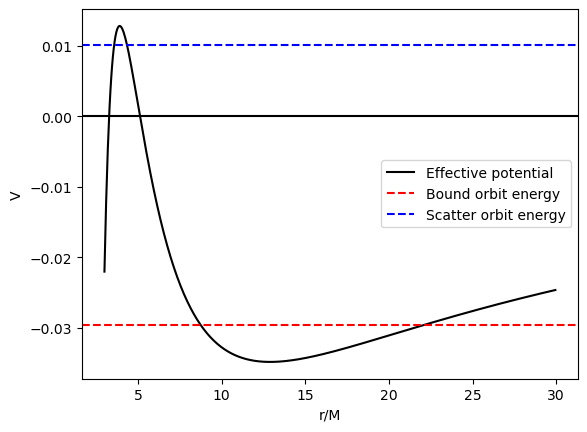

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import ellipk, ellipkinc,ellipeinc
from scipy.optimize import fsolve, root
from scipy.integrate import ode

e_bound = 1-0.03
e_scatter = 1+0.01
l=4.1
#### Constants cgs #####
G = 6.674*10**-8
c = 3*10**10
Msun = 1.98855*10**33 #g

r = np.arange(3,30,0.05)
Ve = ((1-2/r)*(1 + l**2/r**2)-1)/2

plt.figure()

plt.plot(r,Ve,'k', label='Effective potential')
plt.axhline(0, color='k')
plt.axhline(0.5*(e_bound**2-1), color='r', linestyle='--', label='Bound orbit energy')
plt.axhline(0.5*(e_scatter**2-1), color='b', linestyle='--', label='Scatter orbit energy')
plt.xlabel('r/M')
plt.ylabel('V')
plt.legend()
plt.show()

In [4]:
def eqsystem(t, x_vec,l,minus = True):
    r, phi = x_vec
    V = ((1-2/r)*(1 + l**2/r**2))/2.

    dphidt = l/r**2

    if minus:
        drdt = -np.sqrt(e_bound**2-(1-2/r)*(1 + l**2/r**2))
    else:
        drdt = np.sqrt(e_bound**2-(1-2/r)*(1 + l**2/r**2))

    return([drdt, dphidt])

In [67]:
# Initial conditions

t0 = 0
tf = 220
dt = 0.1

r0 = 25
phi0 = 0

x0 = [r0,phi0]

# e = e_scatter

# Initialisation:

### Method #####
#backend = "dopri5"
backend = "dop853"
#backend = "lsoda"

rsol_array = []
phisol_array = []
t_array = []

for i in np.arange(0,5):
    e = e_scatter - i*0.001

    x_result = [x0]
    t_output = [t0]

    solver_minus = ode(eqsystem)
    solver_minus.set_integrator(backend)
    solver_minus.set_initial_value(x0, t0)
    solver_minus.set_f_params(l, True)

    solver_plus = ode(eqsystem)
    solver_plus.set_integrator(backend)
    solver_plus.set_initial_value(x0, t0)
    solver_plus.set_f_params(l,False)

    solver = solver_minus

    while solver_minus.successful() and solver_plus.successful() and solver.t < tf:
        r_ = solver.y[0]
        if e**2-(1-2/r_)*(1 + l**2/r_**2) < 1e-5:
            solver = solver_plus
            solver.set_initial_value(solver_minus.y, solver_minus.t)

        solver.integrate(solver.t + dt)

        x_result.append(solver.y)
        t_output.append(solver.t)
        
        if solver.y[0]<2:
            print(solver.y)
            break

    rsol, phisol = np.array(x_result).T
    t_output = np.array(t_output)
    rsol_array.append(rsol)
    phisol_array.append(phisol)
    t_array.append(t_output)
print("Last r:",rsol[-1])
print("Last phi:",phisol[-1])
print("Last t:",t_output[-1])

Last r: 37.51547268099838
Last phi: 8.66536220931049
Last t: 220.09999999999178


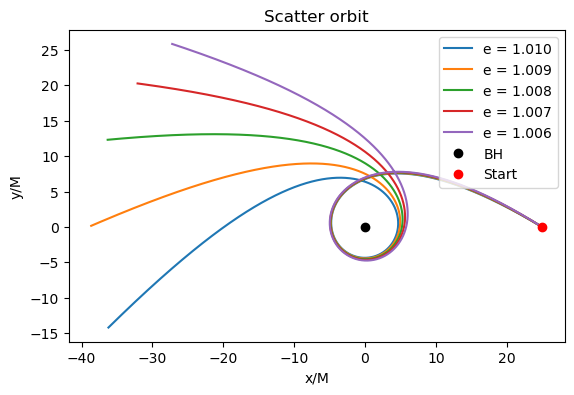

In [68]:
plt.figure()
# plt.plot(rsol*np.cos(phisol),rsol*np.sin(phisol), label='Scatter orbit')
for i in np.arange(0,len(rsol_array)):
    plt.plot(rsol_array[i]*np.cos(phisol_array[i]),rsol_array[i]*np.sin(phisol_array[i]), label='e = %.3f'% (e_scatter - i*0.001))
plt.plot(0,0,'ko',label='BH')
plt.plot(r0*np.cos(phi0),r0*np.sin(phi0),'ro',label='Start')
plt.xlabel('x/M')
plt.ylabel('y/M')
plt.title('Scatter orbit')
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

In [88]:
# Initial conditions
t0 = 0
tf = 1000
dt = 0.1

r0 = 20
phi0 = 0

x0 = [r0, phi0]

# e = e_bound

# Initialisation:
num_orbits = 5  # Number of orbits to integrate

rsol_array = []
phisol_array = []
t_array = []

for i in range(num_orbits):
    e = e_bound + i * 0.001

    x_result = [x0]
    t_output = [t0]

    solver_minus = ode(eqsystem)
    solver_minus.set_integrator(backend)
    solver_minus.set_initial_value(x0, t0)
    solver_minus.set_f_params(l, True)

    solver_plus = ode(eqsystem)
    solver_plus.set_integrator(backend)
    solver_plus.set_initial_value(x0, t0)
    solver_plus.set_f_params(l, False)

    solver = solver_minus

    while solver_minus.successful() and solver_plus.successful() and solver.t < tf:
        r_ = solver.y[0]
        if e ** 2 - (1 - 2 / r_) * (1 + l ** 2 / r_ ** 2) < 1e-5:
            if solver == solver_minus:
                # x_result.pop()
                # t_output.pop()
                solver = solver_plus
                solver.set_initial_value(solver_minus.y, solver_minus.t)
            else:
                # x_result.pop()
                # t_output.pop()
                solver = solver_minus
                solver.set_initial_value(solver_plus.y, solver_plus.t)

        solver.integrate(solver.t + dt)

        x_result.append(solver.y)
        t_output.append(solver.t)

        if solver.y[0] < 2:
            print(solver.y)
            break

    rsol, phisol = np.array(x_result).T
    t_output = np.array(t_output)
    rsol_array.append(rsol)
    phisol_array.append(phisol)
    t_array.append(t_output)

print("Last r:", rsol[-1])
print("Last phi:", phisol[-1])
print("Last t:", t_output[-1])
print("Length of r array:", len(rsol_array))

Last r: 25.740663644529338
Last phi: 16.869225110934806
Last t: 1000.0000000001588
Length of r array: 5


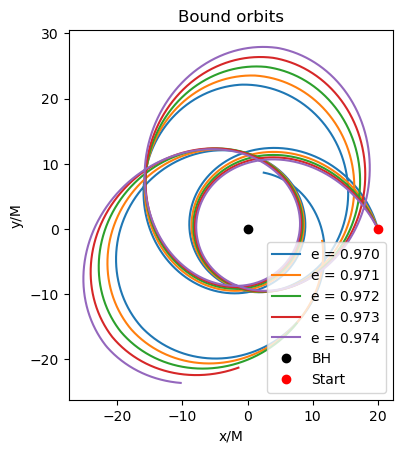

In [90]:
plt.figure()
# plt.plot(rsol*np.cos(phisol),rsol*np.sin(phisol), label='Scatter orbit')
for i in np.arange(0,len(rsol_array)):
    plt.plot(rsol_array[i]*np.cos(phisol_array[i]),rsol_array[i]*np.sin(phisol_array[i]), label='e = %.3f'% (e_bound + i*0.001))
plt.plot(0,0,'ko',label='BH')
plt.plot(r0*np.cos(phi0),r0*np.sin(phi0),'ro',label='Start')
plt.xlabel('x/M')
plt.ylabel('y/M')
plt.title('Bound orbits')
plt.legend()
plt.gca().set_aspect('equal')
plt.show()